## 📘 Cvičenie 7: Prediktívne metódy DM 

👉 **Na tomto cvičení sa:**
- oboznámiš s základnými prediktívnymi metódami dolovania dát – regresiou a klasifikáciou.
- vytvoríš si jednoduché modely lineárnej a viacnásobnej regresie,
- regresné modely skúsiš vyhodnotiť pomocou zaujímavých metrík ako MAE, MSE či RMSE,  
- použiješ základnej klasifikačnej metódy:  
  - rozhodovacie stromy,  
  - naivný Bayesovský klasifikátor,  
  - k-najbližších susedov (k-NN),  
- získané výsledky interpretuješ pomocou grafov, kontingenčných tabuliek a metrík ako presnosť, úspešnosť, návratnosť a F1-skóre.
---

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Lineárna regresia – úvod

Lineárna regresia je metóda, ktorá sa používa na hľadanie vzťahu medzi dvoma premennými.
Predstav si, že chceme zistiť, ako **počet rokov praxe** ovplyvňuje **výšku príjmu**. Očakávame, že čím viac rokov človek pracuje, tým vyšší príjem môže mať – a práve tento vzťah sa dá opísať **priamkou**.

👉 Jednoducho povedané:  
Snažíme sa nájsť **najlepšie padnúcu priamku**, ktorá vyjadruje závislosť medzi rokmi praxe a výškou príjmu. 

### 🎓 Príklad 
Predstavte si, že sledujete skupinu študentov, ktorí začali brigádovať.  
- Ten, kto má 1 rok praxe, zarobí približne 7 € denne.  
- Ten, kto má 5 rokov praxe, už zarobí okolo 15 € denne.  
- Ten, kto má 10 rokov praxe, možno 30 € denne.  

Ak si tieto body zakreslíme do grafu, uvidíme, že sa dajú priblížiť **priamkou**.  
Táto priamka nám potom umožní **odhadnúť príjem aj pre hodnoty, ktoré nemáme priamo v dátach** (napr. pre 7 alebo 15 rokov praxe).

---




## Praktická implementácia modelu Lineárnej regresie

V tejto časti si ukážeme **praktickú implementáciu modelu Lineárnej regresie** s cieľom upriamiť pozornosť na niekoľko základných **MUST HAVE krokov**, ktoré sa budú opakovať aj pri **klasifikačných** aj pri **regresných modeloch**.  

---

## 🚀 Postup

Pôjdeme na to **postupne** a všetko si vysvetlíme na jednoduchej Lineárnej regresii. Budeme pracovať s verejne dostupným datasetom **`Salary_Data.csv`**, ktorý obsahuje dva atribúty:

- **`YearsExperience`** – počet rokov skúseností  
- **`Salary`** – výška platu  

---

## MUST HAVE kroky

### 1️⃣ Definovanie premenných X a y

Vždy si musíme na začiatku po načítanú datasetu definovať predikujúce atribúty a cieľový atribút:

- **`X`** – predstavuje **predikujúci atribút/atribúty**  
- **`y`** – predstavuje **cieľový (predikovaný) atribút**

#### V našom prípade (lineárna regresia):
> 💬 V našej úlohe predikujeme **plat (Salary)** na základe **rokov skúseností (YearsExperience)**.  
>
> ```python
> X = data[["YearsExperience"]]
> y = data["Salary"]
> ```

Keby si chcel pri iných modeloch ako napríklad **Random Forest** predikovať cieľový atribút pomocou všetkých ostatných atribútov, postup a základný princíp ostáva rovnaký a používa sa zápis, ktorým do premennej **`X`** uložíme **všetky atribúty okrem cieľového**. V kóde to potom môže vyzerať nasledovne: 

> ```python
> X = data.drop("Cieľový atribút", axis=1)
> y = data["Cieľový atribút"]
> ```



In [3]:
#Praktická implementácia na ukážku 
import pandas as pd

salary = pd.read_csv("Salary_Data.csv")
#salary.head()

X = salary[["YearsExperience"]]
y = salary["Salary"]

### 2️⃣ Rozdelenie dát na trénovaciu a testovaciu množinu

Druhým krokom je **rozdeliť množinu dát** na **trénovaciu** a **testovaciu časť**, aby sme mohli model natrénovať na trénovacích dátach a následne overiť, ako dobre sa náš model učí na nových dátach.

#### Praktická implementácia:

> 💬 Použijeme **70 % dát na trénovanie** a **30 % na testovanie**. Môžete však zvoliť aj iné pomery, napríklad 80:20.  
> Na rozdelenie používame príkaz **`train_test_split`** z knižnice **scikit-learn**.
>
> ```python
> from sklearn.model_selection import train_test_split
>
> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
> ```

#### Poznámky:

- **`test_size=0.3`** → 30 % dát pôjde do testovacej množiny  
- **`random_state=1`** → zabezpečí, že rozdelenie dát bude vždy rovnaké (reprodukovateľné)  
- Po rozdelení môžeme overiť rozmery dát:

> ```python
> X_train.shape, X_test.shape
> ```

Základný princíp ostáva rovnaký pre všetky modely:  

- **`X_train`, `y_train`** → dáta, na ktorých sa model učí  
- **`X_test`, `y_test`** → dáta, na ktorých sa model testuje


In [4]:
# Praktická implementácia
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#kedze v datasete máme 30 záznamov tak 70 percent predstavuje 21 príkladov, tie sa použijú na trénovanie modelu
#zvysných 9 príkladov, ktoré predstavujú 30 percent sa použijú na testovanie modelu
X_train.shape, X_test.shape

((21, 1), (9, 1))

### 3️⃣ Vytvorenie a natrénovanie modelu

Tretím krokom je **vytvorenie modelu**.  
Každý model má svoj VLASTNÝ príkaz na inicializáciu.  
V našom prípade použijeme model **Lineárnej regresie** z knižnice `sklearn.linear_model`.

#### Praktická implementácia:

> 💬 Vytvoríme objekt modelu a následne ho **natrénujeme (fitujeme)** na **trénovacích dátach** `X_train` a `y_train`.
>
> ```python
> from sklearn.linear_model import LinearRegression
>
> # vytvorenie modelu
> model = LinearRegression()
>
> # trénovanie (fitovanie) modelu na trénovacích dátach
> model.fit(X_train, y_train)
> ```

#### Poznámka:

- **Fitovanie = trénovanie modelu** → model sa učí vzťah medzi predikujúcim/predikujúcimi atribútmi a cieľovým atribútom  
- **Vždy používame na trénovanie modelu trénovacie dáta (`X_train`, `y_train`)**, nikdy testovacie


In [5]:
#Praktická implementácia
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 4️⃣ Predikcia hodnôt pomocou vytvoreného modelu

Po natrénovaní môžeme model použiť na **predikciu hodnôt pre nové dáta**, napríklad **testovaciu množinu**.

#### Praktická implementácia:

> 💬 Použijeme trénovaný model na **predikciu hodnôt pre testovaciu množinu** `X_test`.
>
> ```python
> # predikcia hodnôt
> y_pred = model.predict(X_test)
> ```

#### Poznámka:

- Predikciu **vykonávame vždy na dátach, ktoré model ešte nevidel** (testovacia množina)  
- Hodnoty `y_pred` môžeme následne použiť na vyhodnotenie presnosti modelu, napríklad pomocou metrik **R², MAE alebo MSE**


In [5]:
y_pred = model.predict(X_test)

### 5️⃣ Vizualizácia a vyhodnotenie modelu

Po predikcii hodnôt môžeme **vizualizovať porovnanie skutočných a predikovaných hodnôt** pomocou scatterplotu a zároveň model vyhodnotiť pomocou metrík ako **R²** či **MAPE**.

#### Praktická implementácia – scatterplot:

> 💬 Porovnanie predikovaných hodnôt s testovacími dátami.
>
> ```python
> import matplotlib.pyplot as plt
>
> plt.scatter(X_test, y_test, color='green', label='Testing Data')
> plt.plot(X_test, y_pred, color='orange', label='Prediction Line')
> plt.title('Testing Data')
> plt.xlabel('YearsExperience')
> plt.ylabel('Salary')
> plt.legend()
> plt.show()
> ```

#### Praktická implementácia – vyhodnotenie pomocou metrík:

> 💬 Použijeme metriky **R²** a **MAPE**. Pre iné typy úloh môžeme využiť aj **MSE** alebo **MAE** prípadne všetky. Uvedomte si, že výber vhodných metrík na testovanie závisí od viacerých vecí ako napríklad modelu, typu úlohy, samotného cieľa. 
>
> ```python
> from sklearn.metrics import r2_score, mean_absolute_percentage_error
>
> r2 = r2_score(y_test, y_pred)
> mape = mean_absolute_percentage_error(y_test, y_pred)
>
> print(f"R²: {r2:.4f}")
> print(f"MAPE: {mape:.4f}")
> ```





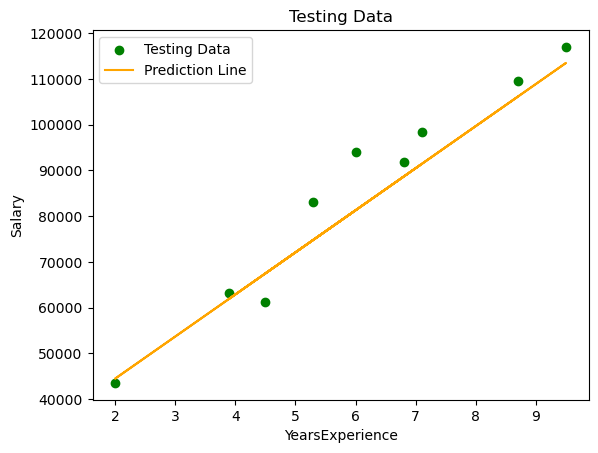

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='orange', label='Prediction Line')
plt.title('Testing Data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

R²: 0.9249
MAPE: 0.0605


## Legenda hovorí, že tento postup musíš vedieť nie len na zápočte ale aj o POLNOCI v bare s drinkom v ruke!


---
# Viacnásobná regresia – úvod

Viacnásobná regresia je **rozšírenie lineárnej regresie**, kde sa snažíme predikovať závislú premennú na základe **viacerých nezávislých premenných** naraz.  

👉 Jednoducho povedané:  
Hľadáme **najlepšiu hyperrovinu**, ktorá opisuje vzťah medzi viacerými vstupnými premennými a výstupnou premennou (cena).

### 🎓 Príklad
Predstav si, že ideš predikovať cenu nehnuteľnosti, ktorý závisí od viacerých faktorov ako napríklad: 
- Rozloha
- Počet izieb
- Lokalita
- atď

---


### Úloha 2: Viacnásobná regresia

1. Načítaj dáta o jednotlivých štátoch v USA do dataframe `state`.  
   Dáta sú dostupné v súbore: [state.csv](https://peter.butka.website.tuke.sk/res/state.csv) alebo si ich môžeš stiahnút z Moodlu.
   Prezri si ich, skontroluj chýbajúce hodnoty a oboznám sa so štruktúrou datasetu.

2. Definuj si predikujúce atribúty `Illiteracy` a `Life_Exp` a cieľový atribút `Murder`, ulož ich do premenných X a y. 
   Následne rozdeľ dáta na trénovaciu a testovaciu množinu v pomere 70 : 30.

3. Vytvor model viacnásobnej lineárnej regresie `model2` a natrénuj ho na trénovacích dátach.

4. Použi model na predikovanie hodnôt `Murder` na testovacej množine (`X_test`) a predikované hodnoty ulož do premennej `y_pred`.

5. Porovnaj skutočné a predikované hodnoty pomocou vizualizácie (napr. scatterplotu).

6. Vyhodnoť presnosť modelu pomocou metrík:
   - MAE – Mean Absolute Error  
   - MSE – Mean Squared Error  
   - RMSE – Root Mean Squared Error  

> 💡 Viacnásobná regresia umožňuje zahrnúť viac predikujúcich premenných, čím model lepšie zachytí závislosť cieľovej premennej.  


---




   Unnamed: 0  Population  Income  Illiteracy  Life.Exp  Murder  HS.Grad  \
0     Alabama        3615    3624         2.1     69.05    15.1     41.3   
1      Alaska         365    6315         1.5     69.31    11.3     66.7   
2     Arizona        2212    4530         1.8     70.55     7.8     58.1   
3    Arkansas        2110    3378         1.9     70.66    10.1     39.9   
4  California       21198    5114         1.1     71.71    10.3     62.6   

   Frost    Area  
0     20   50708  
1    152  566432  
2     15  113417  
3     65   51945  
4     20  156361  
Unnamed: 0    0
Population    0
Income        0
Illiteracy    0
Life.Exp      0
Murder        0
HS.Grad       0
Frost         0
Area          0
dtype: int64


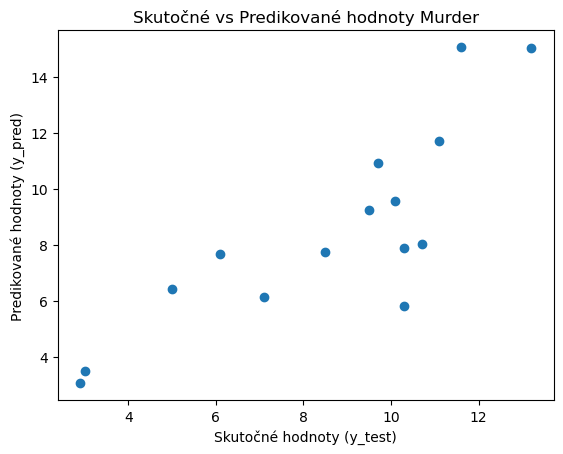

MAE: 1.517769301430405
MSE: 3.778180343634904
RMSE: 1.9437541880687754


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Načítanie dát
state = pd.read_csv('state.csv')

# Zobrazenie prvých pár riadkov dát
print(state.head())

# Skontrolovanie chýbajúcich hodnôt
print(state.isnull().sum())

# Definovanie X (predikujúce atribúty) a y (cieľový atribút)
X = state[['Illiteracy', 'Life.Exp']]  # Opravený názov stĺpca na 'Life.Exp'
y = state['Murder']

# Rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vytvorenie modelu
model2 = LinearRegression()

# Natrénovanie modelu na trénovacích dátach
model2.fit(X_train, y_train)

# Predikovanie hodnôt Murder pre testovaciu množinu
y_pred = model2.predict(X_test)

# Vizualizácia skutočných a predikovaných hodnôt pomocou scatterplotu
plt.scatter(y_test, y_pred)
plt.xlabel('Skutočné hodnoty (y_test)')
plt.ylabel('Predikované hodnoty (y_pred)')
plt.title('Skutočné vs Predikované hodnoty Murder')
plt.show()

# Vyhodnotenie presnosti modelu pomocou metrík
# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# MSE - Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


# Rozhodovací strom – úvod

Rozhodovací strom je **metóda strojového učenia** používaná na klasifikáciu alebo regresiu.  Predstav si ho ako sériu **rozhodnutí "áno/nie"**, ktoré postupne vedú k predikcii cieľovej premennej.

👉 Jednoducho povedané:  
Rozhodovací strom vytvára **hierarchickú štruktúru**, ktorá umožňuje predikovať kategóriu alebo hodnotu pre nové dáta.


### 🎓 Príklad
Predstav si, že pracuješ v banke a chceš predikovať, či nový klient predstavuje **vysoké alebo nízke riziko úveru**:  
- Ak má klient vysoký príjem a stabilnú históriu splácania, patrí do kategórie **"nízke riziko"**.  
- Ak má nízky príjem a nespláca pravidelne, patrí do kategórie **"vysoké riziko"**.  
- Ak má priemerný príjem, ale vysoký dlh, môže patriť do kategórie **"stredné riziko"**.  

Rozhodovací strom analyzuje rôzne atribúty klienta (napr. príjem, aktuálne dlhy, počet omeškaných platieb) a rozhoduje, do ktorej kategórie klient patrí.  
Takto môže banka **predikovať riziko nového klienta** a prijať adekvátne opatrenia pri schvaľovaní úveru.

---

## Čo je to Confusion Matrix?

**Confusion Matrix** je jednoduchý spôsob, ako zistiť, **ako dobre klasifikačný model predpovedá jednotlivé triedy**.  
Porovnáva **skutočné hodnoty (y_test)** so **skutočne predikovanými hodnotami (y_pred)**.

---

### 📊 Štruktúra confusion matrix:

|                     | Predikované: 0 | Predikované: 1 |
|---------------------|----------------|----------------|
| **Skutočné: 0**     | ✅ True Negative (TN) | ❌ False Positive (FP) |
| **Skutočné: 1**     | ❌ False Negative (FN) | ✅ True Positive (TP) |

---

### 💬 Ako to čítať?

- **True Positive (TP):** príklad patrí do triedy 1 a model mu predikoval, že patrí do triedy 1
- **True Negative (TN):** príklad patrí do triedy 0 a model mu predikoval, že patrí do triedy 0
- **False Positive (FP):** príklad patrí do triedy 0 a model mu predikoval, že patrí do triedy 1 
- **False Negative (FN):** príklad patrí do triedy 1 a model mu predikoval, že patrí do triedy 0

---

### 🐍 Príklad v Pythone:

> ```python
> from sklearn.metrics import confusion_matrix
> import numpy as np
>
> # Skutočné a predikované hodnoty
> y_test = np.array([0, 1, 0, 1, 0, 1, 1])
> y_pred = np.array([0, 0, 0, 1, 1, 1, 0])
>
> # Výpočet confusion matrix
> cm = confusion_matrix(y_test, y_pred)
> print(cm)
> ```
>
> Výstup:
> ```
> [[2 1]
>  [1 3]]
> ```

---

### 🔍 Interpretácia výsledku:

Z matice  

- **TN = 2** (2 nuly správne predikované ako 0)  
- **FP = 1** (1 nula zle predikovaná ako 1)  
- **FN = 1** (1 jednotka zle predikovaná ako 0)  
- **TP = 3** (3 jednotky správne predikované ako 1)  

---

💡 **Zhrnutie:**  
Confusion matrix ti ukazuje, **koľko predikcií bolo správnych a koľko chybných**.  
Je to základ pre výpočet metrík ako **accuracy**, **precision**, **recall** a **F1-score**.


## 🧾 Čo je to Classification Report?

**Classification Report** je súhrnná tabuľka metrík, ktorá z Confusion Matrix automaticky vypočíta najdôležitejšie hodnoty pre každú triedu:

- **Precision (Presnosť)** – koľko z predikcií danej triedy bolo správnych → TP / (TP + FP)  
- **Recall (Návratnosť / Sensitivity)** – koľko skutočných prípadov model správne identifikoval → TP / (TP + FN)  
- **F1-score** – harmonický priemer precision a recall → 2 * (Precision * Recall) / (Precision + Recall)  
- **Support** – počet skutočných vzoriek danej triedy v testovacej množine

---

### 🐍 Príklad v Pythone

> ```python
> from sklearn.metrics import classification_report
> import numpy as np
>
> y_test = np.array([0, 1, 0, 1, 0, 1, 1])
> y_pred = np.array([0, 0, 0, 1, 1, 1, 0])
>
> report = classification_report(y_test, y_pred)
> print(report)

Tento príklad si skopírujte, a skúšajte si meniť hodnoty y_test a y_pred. Pozorujte, ako tieto zmeny vplývajú na precision, recall, f1-score. Ako to vplýva na marco avg. Support máte v tomto príklade 3 a 4 lebo v y_test máme tri 0 a štyri 1. 


In [8]:

from sklearn.metrics import classification_report
import numpy as np

y_test = np.array([0, 1, 0, 1, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 1, 1, 1])

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.75      0.75      0.75         4

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



---
### Úloha 3: Rozhodovací strom 🌳

**Úlohy:**

1. Načítaj **dáta CO2** (alebo údaje klientov banky) do dataframe s názvom `CO2`.  
   - Dáta sú dostupné v csv súbore: [CO2.csv](https://peter.butka.website.tuke.sk/res/CO2.csv) alebo na Moodly.  
   - Odstráň stĺpce `Plant` a prípadne aj `Unnamed: 0`, ak sa v datasete nachádzajú.

2. Definuj **vstupné a cieľové atribúty**:  
   - `X` = všetky atribúty okrem `Treatment`  
   - `y` = atribút `Treatment`  

3. Zakóduj **kategorické atribúty** v `X` pomocou **one-hot encodingu**, aby model vedel pracovať aj s kategorickými premennými.

4. Rozdeľ dáta na **trénovaciu** a **testovaciu množinu** v pomere **70:30** pomocou `train_test_split`.  
   - `X_train`, `X_test`, `y_train`, `y_test`  

5. Vytvor **model rozhodovacieho stromu** s názvom `co2_tree`, ktorý bude predikovať hodnotu atribútu `Treatment` na základe všetkých ostatných atribútov.  
   - Nezabudni model **natrénovať** pomocou trénovacích dát.

6. Vizualizuj strom:  
   - zobraz **slovnú podobu** rozhodovacieho stromu,  
   - a následne aj **grafickú podobu** pomocou vhodnej knižnice.

7. Po natrénovaní modelu vykonaj **predikciu na testovacích dátach** a ulož výsledky do premennej `y_pred_tree`.

8. Vyhodnoť výkon modelu:  
   - vytvor **confusion matrix** (kontingenčnú tabuľku),  
   - vypočítaj precision, recall, f1-score pomocou **classification_report**.

> 💡 **Tip:**  
> Metriky z **confusion matrix** ti ukážu, ako dobre model klasifikuje jednotlivé triedy a kde robí chyby.  
> Na komplexné vyhodnotenie môžeš použiť `classification_report` z knižnice **scikit-learn**.  


   Unnamed: 0 Plant    Type   Treatment  conc  uptake
0           1   Qn1  Quebec  nonchilled    95    16.0
1           2   Qn1  Quebec  nonchilled   175    30.4
2           3   Qn1  Quebec  nonchilled   250    34.8
3           4   Qn1  Quebec  nonchilled   350    37.2
4           5   Qn1  Quebec  nonchilled   500    35.3
|--- uptake <= 21.95
|   |--- conc <= 212.50
|   |   |--- uptake <= 10.95
|   |   |   |--- class: chilled
|   |   |--- uptake >  10.95
|   |   |   |--- conc <= 135.00
|   |   |   |   |--- uptake <= 13.90
|   |   |   |   |   |--- class: nonchilled
|   |   |   |   |--- uptake >  13.90
|   |   |   |   |   |--- uptake <= 15.20
|   |   |   |   |   |   |--- class: chilled
|   |   |   |   |   |--- uptake >  15.20
|   |   |   |   |   |   |--- class: nonchilled
|   |   |   |--- conc >  135.00
|   |   |   |   |--- uptake <= 18.60
|   |   |   |   |   |--- class: chilled
|   |   |   |   |--- uptake >  18.60
|   |   |   |   |   |--- Type_Mississippi <= 0.50
|   |   |   |   |   |  

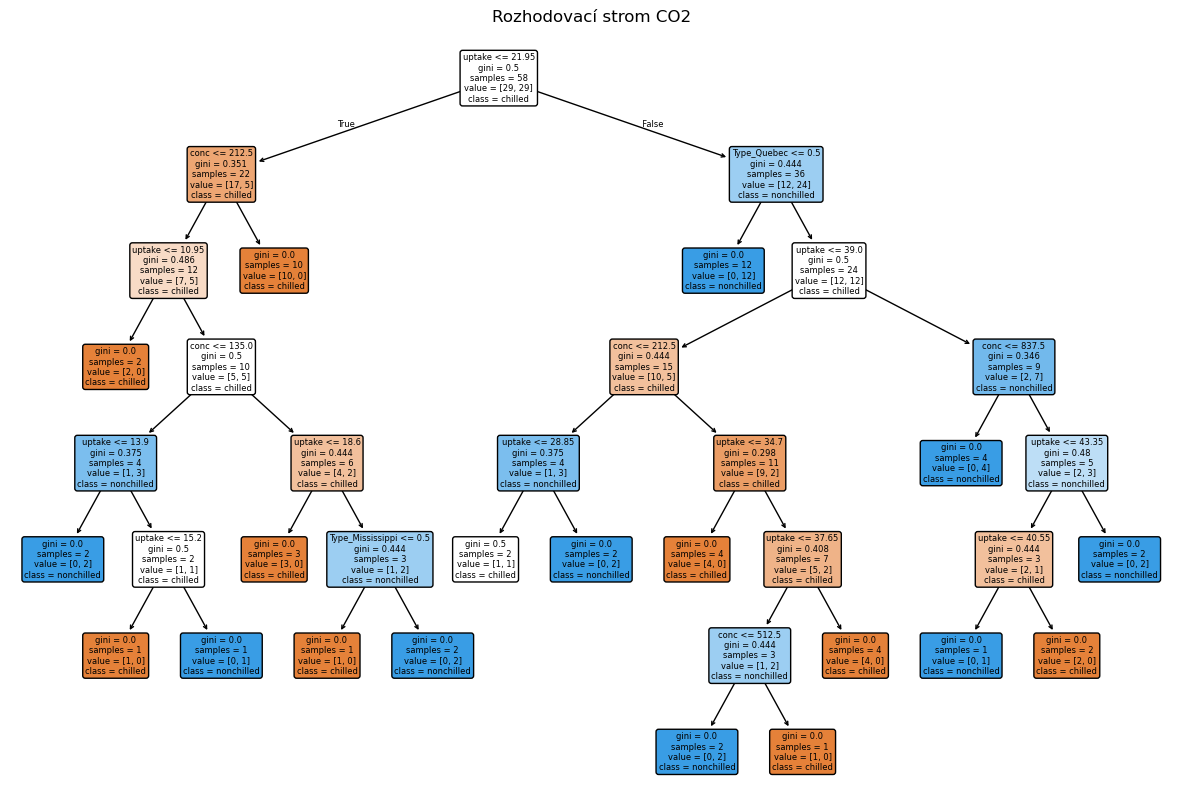

Confusion Matrix:
[[10  3]
 [ 1 12]]


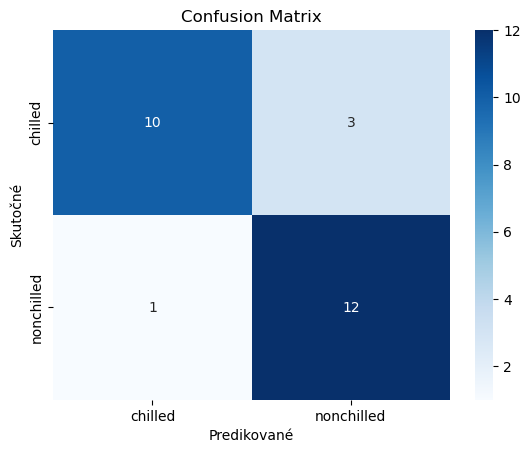


Classification Report:
              precision    recall  f1-score   support

     chilled       0.91      0.77      0.83        13
  nonchilled       0.80      0.92      0.86        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



In [9]:
#TIME TO SHINE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Načítanie dát a odstránenie nepotrebných stĺpcov
CO2 = pd.read_csv('CO2.csv')

# Zobrazenie prvých pár riadkov dát
print(CO2.head())

# Odstránenie stĺpcov 'Plant' a 'Unnamed: 0' (ak existujú)
CO2 = CO2.drop(columns=['Plant', 'Unnamed: 0'], errors='ignore')

# 2. Definovanie vstupných a cieľových atribútov
X = CO2.drop(columns=['Treatment'])
y = CO2['Treatment']

# 3. Zakódovanie kategorických atribútov v X pomocou One-Hot Encoding
X_encoded = pd.get_dummies(X)

# 4. Rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 5. Vytvorenie a natrénovanie modelu rozhodovacieho stromu
co2_tree = DecisionTreeClassifier(random_state=42)
co2_tree.fit(X_train, y_train)

# 6. Vizualizácia rozhodovacieho stromu
# Zobrazíme textovú verziu rozhodovacieho stromu
from sklearn.tree import export_text
tree_rules = export_text(co2_tree, feature_names=list(X_encoded.columns))
print(tree_rules)

# Grafická vizualizácia stromu
plt.figure(figsize=(15,10))
plot_tree(co2_tree, filled=True, feature_names=X_encoded.columns, class_names=co2_tree.classes_, rounded=True)
plt.title('Rozhodovací strom CO2')
plt.show()

# 7. Predikcia na testovacích dátach
y_pred_tree = co2_tree.predict(X_test)

# 8. Vyhodnotenie výkonu modelu
# Kontingenčná tabuľka (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:")
print(conf_matrix)

# Vizualizácia confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=co2_tree.classes_, yticklabels=co2_tree.classes_)
plt.xlabel('Predikované')
plt.ylabel('Skutočné')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))


In [59]:
# TIME TO SHINE 

## 4️⃣ Naivný Bayesovský klasifikátor – úvod

Naivný Bayesovský klasifikátor je **pravdepodobnostná klasifikačná metóda**, ktorá využíva **Bayesovú vetu** a predpoklad **nezávislosti atribútov**.  
Je vhodný najmä pre rýchlu klasifikáciu s viacerými vstupnými premennými.

👉 Jednoducho povedané:  
Model odhaduje pravdepodobnosť, že nový záznam patrí do konkrétnej triedy, na základe **pravdepodobnosti hodnôt jednotlivých atribútov**. Príklad je vo výsledku zaradený do triedy s najvyššou pravdepodobnosťou. 

---

### Úloha 4: Naivný Bayesovský klasifikátor

**Úlohy:**

1. Použi rovnaké rozdelenie dát na **trénovaciu** a **testovaciu množinu** (`test_data`) ako pri rozhodovacom strome. Budeme pracovať s rovnakým datasetom ako pri Rozhodovacom strome.

2. Vytvor **Naivný Bayesovský klasifikátor** pre cieľový atribút `Treatment`.  
   - Použi **len stĺpce `conc` a `uptake`** ako vstupné atribúty.

3. Predikuj hodnoty pre testovaciu množinu a porovnaj ich s reálnymi hodnotami pomocou **kontingenčnej tabuľky (confusion matrix)**.

4. Vypíš klasifikačný report.

6. **Druhá časť úlohy:** opäť klasifikuj cieľový atribút `Type`, no tentokrát sa zamyslíš nad diskretizíciou vstupných atribútov.   
   - Použi **tiež stĺpce `conc` a `uptake`**, ale najprv navrhni **diskretizáciu vstupných atribútov**. Diskretizuj aspoň jeden zo vstupných atribútov. Pre pripomenutie, na predošlom cviku sme spomínali ekvidištančnú, ekvifrekvenčnú diskretizáciu a potom diskretizáciu s pevne danými hranicamiú/intervalmi. Skús sa zamyslieť, aký typ by možno mal zmysel v tomto príklade a aký by bol jeho impact na výsledok a presnosť modelu.  
   - Vypíš výsledky na testovacej množine rovnako ako predtým (kontingenčná tabuľka a Classification Report) a porovnaj s predošlým modelom.

>💡 **Tipy:**  
>- Diskretizácia vstupných premenných pomáha Naivnému Bayesovi pri numerických atribútoch.  
>- Vždy sa uisti, že testovacia množina nie je použitá na trénovanie modelu.  
>- Hodnoty metrík ti pomôžu vyhodnotiť, ako dobre model zvláda predikciu pre každú triedu.



Naivný Bayesovský Klasifikátor - Pôvodné dáta:
Confusion Matrix:
[[ 9  4]
 [ 3 10]]


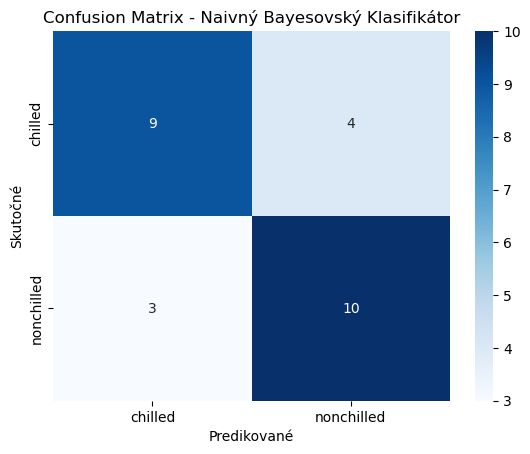


Classification Report:
              precision    recall  f1-score   support

     chilled       0.75      0.69      0.72        13
  nonchilled       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26


Naivný Bayesovský Klasifikátor - Diskretizované dáta:
Confusion Matrix - Diskretizované dáta:
[[9 4]
 [4 9]]


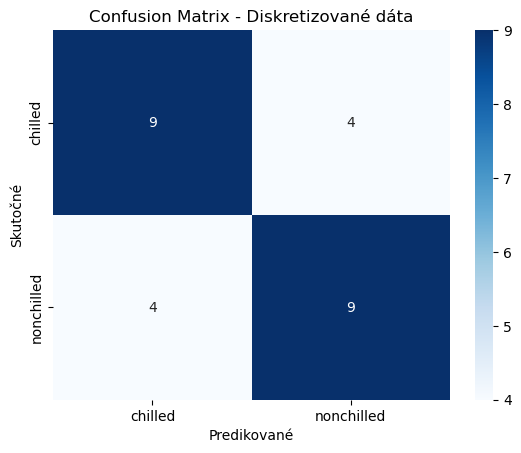


Classification Report - Diskretizované dáta:
              precision    recall  f1-score   support

     chilled       0.69      0.69      0.69        13
  nonchilled       0.69      0.69      0.69        13

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt

# Načítanie dát
CO2 = pd.read_csv('CO2.csv')

# Odstránenie nepotrebných stĺpcov
CO2 = CO2.drop(columns=['Plant', 'Unnamed: 0'], errors='ignore')

# Rozdelenie dát na vstupné atribúty a cieľový atribút
X = CO2[['conc', 'uptake']].copy()  # Explicitne vytvoríme kópiu
y = CO2['Treatment']  # cieľový atribút 'Treatment'

# 1. Naivný Bayesovský klasifikátor na pôvodných, ne-diskretizovaných dátach
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vytvorenie a natrénovanie Naivného Bayesovského modelu
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predikcia na testovacích dátach
y_pred_nb = nb_classifier.predict(X_test)

# Vyhodnotenie výkonu modelu
print("\nNaivný Bayesovský Klasifikátor - Pôvodné dáta:")
# Kontingenčná tabuľka (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix)

# Vizualizácia confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predikované')
plt.ylabel('Skutočné')
plt.title('Confusion Matrix - Naivný Bayesovský Klasifikátor')
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# -----------------------------------
# 2. Naivný Bayesovský klasifikátor po diskretizácii atribútov

# Diskretizácia vstupných atribútov
# Ekvidištančná diskretizácia pre 'conc' (3 intervaly)
conc_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X['conc_discretized'] = conc_discretizer.fit_transform(X[['conc']])

# Ekvifrekvenčná diskretizácia pre 'uptake' (4 intervaly)
uptake_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X['uptake_discretized'] = uptake_discretizer.fit_transform(X[['uptake']])

# Používame diskretizované stĺpce
X_discretized = X[['conc_discretized', 'uptake_discretized']]

# Rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(X_discretized, y, test_size=0.3, random_state=42)

# Vytvorenie a natrénovanie Naivného Bayesovského modelu na diskretizovaných dátach
nb_classifier_discretized = GaussianNB()
nb_classifier_discretized.fit(X_train, y_train)

# Predikcia na testovacích dátach
y_pred_discretized = nb_classifier_discretized.predict(X_test)

# Vyhodnotenie výkonu modelu na diskretizovaných dátach
print("\nNaivný Bayesovský Klasifikátor - Diskretizované dáta:")
# Kontingenčná tabuľka (confusion matrix)
conf_matrix_discretized = confusion_matrix(y_test, y_pred_discretized)
print("Confusion Matrix - Diskretizované dáta:")
print(conf_matrix_discretized)

# Vizualizácia confusion matrix
sns.heatmap(conf_matrix_discretized, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier_discretized.classes_, yticklabels=nb_classifier_discretized.classes_)
plt.xlabel('Predikované')
plt.ylabel('Skutočné')
plt.title('Confusion Matrix - Diskretizované dáta')
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report - Diskretizované dáta:")
print(classification_report(y_test, y_pred_discretized))


## 5️⃣ K-najbližších susedov (k-NN) – úvod

K-najbližších susedov (k-NN) je **jedna z najjednoduchších klasifikačných metód**, ktorá sa používa na klasifikáciu triedy nového záznamu na základe **najbližších k záznamov** v trénovacích dátach.

👉 Jednoducho povedané:  
Nový bod sa zaradí do triedy, ktorá je **najčastejšia medzi jeho k najbližšími susedmi**.  
Metóda nevyžaduje zložité trénovanie – len **uloží všetky trénovacie dáta** a pri predikcii porovná vzdialenosti.

---


### Úloha 5: K-najbližších susedov (dáta CO2)

**Úlohy:**
1. Rozdeľ dáta CO2 na **trénovaciu** a **testovaciu množinu**  v pomere 80 ku 20.  
   - Použi iba atribúty `conc` a `uptake`, cieľový atribút je `Treatment`.

3. Použi metódu **k-NN** s nastavenám hodnoty `k = 2` na predikciu cieľového atribútu pre testovaciu množinu.  
   - Výsledky ulož do premennej `co2_pred`.

4. Porovnaj predikované hodnoty (`co2_pred`) s reálnymi hodnotami pomocou **kontingenčnej tabuľky**.

5. Vypočítaj **úspešnosť, presnosť, návratnosť a F1-skóre** klasifikácie pomocou klasifikačného reportu. 



K-NN Klasifikátor - Predikcie pre CO2:
Confusion Matrix:
[[8 0]
 [7 2]]


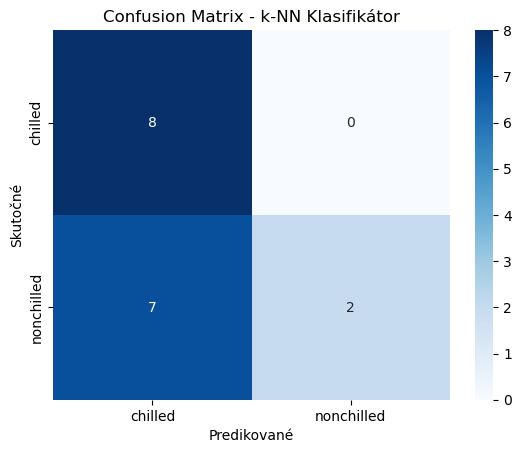


Classification Report:
              precision    recall  f1-score   support

     chilled       0.53      1.00      0.70         8
  nonchilled       1.00      0.22      0.36         9

    accuracy                           0.59        17
   macro avg       0.77      0.61      0.53        17
weighted avg       0.78      0.59      0.52        17



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Načítanie dát
CO2 = pd.read_csv('CO2.csv')

# Odstránenie nepotrebných stĺpcov
CO2 = CO2.drop(columns=['Plant', 'Unnamed: 0'], errors='ignore')

# Rozdelenie dát na vstupné atribúty a cieľový atribút
X = CO2[['conc', 'uptake']]  # len stĺpce 'conc' a 'uptake'
y = CO2['Treatment']  # cieľový atribút 'Treatment'

# Rozdelenie dát na trénovaciu a testovaciu množinu (80% trénovanie, 20% testovanie)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vytvorenie a natrénovanie modelu k-NN s k=2
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)

# Predikcia na testovacích dátach
co2_pred = knn_classifier.predict(X_test)

# Vyhodnotenie výkonu modelu
print("\nK-NN Klasifikátor - Predikcie pre CO2:")
# Kontingenčná tabuľka (confusion matrix)
conf_matrix = confusion_matrix(y_test, co2_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Vizualizácia confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predikované')
plt.ylabel('Skutočné')
plt.title('Confusion Matrix - k-NN Klasifikátor')
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, co2_pred))
